# Определение перспективного тарифа для телеком компании

## Описание проекта

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Необходимо понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных

### Таблица users (информация о пользователях):
- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

### Таблица calls (информация о звонках):
- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях):
- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях):
- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

### Таблица tariffs (информация о тарифах):
- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## План

1. Файлы с данными. Общая информация.
2. Подготовка данных.
    - Привести данные к нужным типам.
    - Найти и справить ошибки.
    - Посчитать контрольные параметры для каждого пользователя.
3. Анализ данных. 
    - Описать поведение клиентов.
    - Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
    - Посчитать среднее количество, дисперсию и стандартное отклонение.
    - Построить гистограммы, описать распределения.
4. Проверка гипотез:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
5. Выводы.

## 1. Файлы с данными. Общая информация.

In [3]:
#Импорт библиотек
import pandas as pd
import math
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

In [4]:
#Импорт файлов с данными
df_calls=pd.read_csv('/datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_messages=pd.read_csv('/datasets/messages.csv')
df_tariffs=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

In [5]:
#Информация о звонках
df_calls.sample()

,id,call_date,duration,user_id
114772,1294_112,2018-09-25,10.88,1294


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Информация о звонках.
202607 наблюдений, пропусков нет. 4 столбца: текстовые (2), действительные числа (1), целые числа (1).

In [7]:
#Информация об интернет-сессиях
df_internet.sample()

,id,mb_used,session_date,user_id
102818,1344_399,747.24,2018-08-24,1344


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Информация об интернет-сессиях.
149396 наблюдений, пропусков нет. 4 столбца: текстовые (2), действительные числа (1), целые числа (1).

In [9]:
#Информация о сообщениях
df_messages.sample()

,id,message_date,user_id
5289,1021_445,2018-11-25,1021


In [10]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Информация о сообщениях.
123036 наблюдений, пропусков нет. 3 столбца: текстовые (2),  целые числа (1).

In [11]:
#Информация о тарифах
df_tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Данные о тарифах корректны.

In [12]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Информация о тарифах.
2 наблюдения, пропусков нет. 8 столбцов: текстовые (1), целые числа (7).

In [13]:
#Информация о пользователях
df_users.sample()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
364,1364,74,NaN,Екатеринбург,Мстислав,Алексеенко,2018-08-29,ultra


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Информация о пользователях.
500 наблюдений, есть пропуски в одной переменной (это корректные значения). 8 столбцов: текстовые (6), целые числа (2).

## 2. Подготовка данных.

### Изменение типа данных.

*call_date, session_date, message_date, reg_date, churn_date* - приведем к типу дата. 

In [15]:
#функция для изменения типа данных "дата"
def convert_to_date (data, column_name):
    data[column_name]=pd.to_datetime(data[column_name], format='%Y.%m.%d')
    
convert_to_date(df_calls, 'call_date')
convert_to_date(df_internet, 'session_date')
convert_to_date(df_messages, 'message_date')
convert_to_date(df_users, 'reg_date')
convert_to_date(df_users, 'churn_date')

Т.к. «Мегалайн» всегда округляет вверх значения минут и мегабайтов.
*duration* и *mb_used* - округлим до целых в большую сторону. 

In [16]:
#Округление в большую сторону
df_calls['duration'] = np.ceil(df_calls['duration'])
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

### Поиск ошибок.

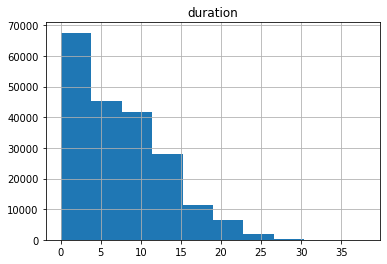

In [17]:
#Длительность звонка
df_calls.hist('duration')
plt.show()

In [18]:
print('Количество наблюдений, где длительность звонка 0:', df_calls[df_calls['duration']==0]['duration'].count())

Количество наблюдений, где длительность звонка 0: 39613


Звонки с длительностью ноль - это скорее всего "недозвон". Мы не будем учитывать их, плата за них не списывалась. Удаляем эти наблюдения. 

In [19]:
#Удаление нулей
df_calls=df_calls[df_calls['duration']!=0]

In [20]:
print('Количество наблюдений, где длительность звонка 0:', df_calls[df_calls['duration']==0]['duration'].count())

Количество наблюдений, где длительность звонка 0: 0


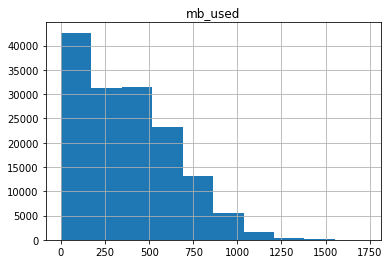

In [21]:
#объём потраченного за сессию интернет-трафика (в мегабайтах)
df_internet.hist('mb_used')
plt.show()

In [22]:
print('Количество наблюдений, где объем потраченного за сессию трафика 0:', df_internet[df_internet['mb_used']==0]['mb_used'].count())

Количество наблюдений, где объем потраченного за сессию трафика 0: 19598


Плата за эти сессии не списывалась, поэтому мы не будем их учитывать. Удаляем эти строки. 

In [23]:
#Удаление нулей
df_internet=df_internet[df_internet['mb_used']!=0]
print('Количество наблюдений, где объем потраченного трафика 0:', df_internet[df_internet['mb_used']==0]['mb_used'].count())

Количество наблюдений, где объем потраченного трафика 0: 0


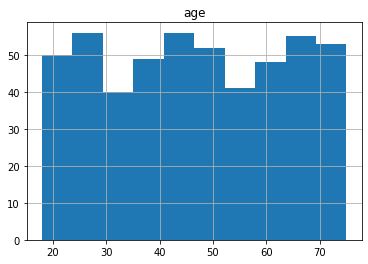

In [24]:
#Возраст пользователей
df_users.hist('age')
plt.show()

По возрасту пользователей данные корректны. 

Итак, ошибки в данных (в переменных "длительность звонка" и "объём потраченного за сессию интернет-трафика") были удалены.

## Подсчет контрольных параметров для каждого пользователя.

### Количество сделанных звонков и израсходованных минут по месяцам.

In [25]:
#Добавление столбца "месяц совершения звонка"
df_calls['call_month']=df_calls['call_date'].dt.month
df_calls.sample(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 5 columns):
id            162994 non-null object
call_date     162994 non-null datetime64[ns]
duration      162994 non-null float64
user_id       162994 non-null int64
call_month    162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.5+ MB


In [26]:
#Группируем df_calls по *user_id* и *call_month* одновременно
df_calls_users=df_calls.groupby(['user_id', 'call_month']).agg({'duration':['count', 'sum']})
df_calls_users.columns=['calls_count', 'sum_min']
df_calls_users.head(10)

calls_count  sum_min
user_id call_month                      
1000    5                    17    159.0
        6                    28    172.0
        7                    41    340.0
        8                    42    408.0
        9                    46    466.0
        10                   44    350.0
        11                   37    338.0
        12                   38    333.0
1001    11                   45    430.0
        12                   47    414.0

In [27]:
#Объединение таблиц
df_calls_users=df_calls_users.merge(df_users, on ='user_id', how='left')[['user_id','calls_count', 'sum_min', 'tariff']]

In [28]:
df_calls_users.head(3)

,user_id,calls_count,sum_min,tariff
0,1000,17,159.0,ultra
1,1000,28,172.0,ultra
2,1000,41,340.0,ultra


In [29]:
#Объединение таблиц
df_calls_users=df_calls_users.merge(df_tariffs, left_on ='tariff', right_on='tariff_name', how='left')[['user_id','calls_count', 'sum_min', 'tariff', 'minutes_included', 'rub_per_minute']]

In [30]:
df_calls_users.head(3)

,user_id,calls_count,sum_min,tariff,minutes_included,rub_per_minute
0,1000,17,159.0,ultra,3000,1
1,1000,28,172.0,ultra,3000,1
2,1000,41,340.0,ultra,3000,1


In [31]:
#Подсчет минут сверх тарифа
df_calls_users['extra_min']=df_calls_users['sum_min']-df_calls_users['minutes_included']

In [32]:
#Замена некорректных значений
df_calls_users['extra_min'][df_calls_users['extra_min']<0]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#Подсчет платы за минуты сверх тарифа
df_calls_users['fee_extra_min']=df_calls_users['extra_min']*df_calls_users['rub_per_minute']

In [34]:
df_calls_users.head(3)

,user_id,calls_count,sum_min,tariff,minutes_included,rub_per_minute,extra_min,fee_extra_min
0,1000,17,159.0,ultra,3000,1,0.0,0.0
1,1000,28,172.0,ultra,3000,1,0.0,0.0
2,1000,41,340.0,ultra,3000,1,0.0,0.0


In [35]:
#Группируем df_calls_users по *user_id* и *tariff*
df_calls_per_month=df_calls_users.groupby(['tariff', 'user_id']).agg({'calls_count':'mean', 'sum_min':'mean', 'fee_extra_min':'mean'})
df_calls_per_month

calls_count     sum_min  fee_extra_min
tariff user_id                                        
smart  1001       46.000000  422.000000           0.00
       1002       24.714286  216.714286           0.00
       1005       60.083333  550.416667         268.75
       1006       37.454545  318.272727           0.00
       1007       53.444444  486.555556         119.00
...                     ...         ...            ...
ultra  1476       57.750000  525.500000           0.00
       1485       72.000000  584.000000           0.00
       1491       58.444444  513.333333           0.00
       1493       44.000000  372.000000           0.00
       1495       93.200000  784.000000           0.00

[492 rows x 3 columns]

Итак, для каждого пользователя посчитали среднее количество звонков и потраченных минут в месяц. В зависомости от его тарифа рассчитали среднюю ежемесячную переплату за доп.минуты. 

(Причем подсчет был организован таким образом: если первые два месяца пользователь расходует на 100 мин меньше пакета, а на третий месяц больше на 50 мин, средняя доплата за три месяца в нашей таблице будет положительная. Так как фикс.плата за тариф является не снижаемой.).

### Количество отправленных сообщений по месяцам

In [36]:
#Добавление столбца "месяц отправки сообщения"
df_messages['message_month']=df_messages['message_date'].dt.month
df_messages.sample(2)

,id,message_date,user_id,message_month
43679,1189_54,2018-08-08,1189,8
76198,1323_201,2018-10-05,1323,10


In [37]:
#Группируем df_messages по *user_id* и *message_month* одновременно
df_messages_users=df_messages.groupby(['user_id', 'message_month']).agg({'id':'count'})
df_messages_users.columns=['messages_count']
df_messages_users.head(10)

messages_count
user_id message_month                
1000    5                          22
        6                          60
        7                          75
        8                          81
        9                          57
        10                         73
        11                         58
        12                         70
1002    6                           4
        7                          11

In [38]:
#Объединение таблиц
df_messages_users=df_messages_users.merge(df_users, on ='user_id', how='left')[['user_id','messages_count', 'tariff']]

In [39]:
#Объединение таблиц
df_messages_users=df_messages_users.merge(df_tariffs, left_on ='tariff', right_on='tariff_name', how='left')[['user_id','messages_count', 'tariff', 'messages_included', 'rub_per_message']]

In [40]:
df_messages_users.head(3)

,user_id,messages_count,tariff,messages_included,rub_per_message
0,1000,22,ultra,1000,1
1,1000,60,ultra,1000,1
2,1000,75,ultra,1000,1


In [41]:
#Подсчет сообщений сверх тарифа
df_messages_users['extra_messages']=df_messages_users['messages_count']-df_messages_users['messages_included']

In [42]:
#Замена некорректных значений
df_messages_users['extra_messages'][df_messages_users['extra_messages']<0]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
#Подсчет платы за сообщения сверх тарифа
df_messages_users['fee_extra_messages']=df_messages_users['extra_messages']*df_messages_users['rub_per_message']

In [44]:
df_messages_users.head(3)

,user_id,messages_count,tariff,messages_included,rub_per_message,extra_messages,fee_extra_messages
0,1000,22,ultra,1000,1,0,0
1,1000,60,ultra,1000,1,0,0
2,1000,75,ultra,1000,1,0,0


In [45]:
#Группируем df_calls_users по *user_id* и *tariff*
df_messages_per_month=df_messages_users.groupby(['tariff', 'user_id']).agg({'messages_count':'mean', 'fee_extra_messages':'mean'})
df_messages_per_month

messages_count  fee_extra_messages
tariff user_id                                    
smart  1002             10.000                0.00
       1005             46.000                8.25
       1007             25.000                0.00
       1008             56.000               18.00
       1009             11.000                0.00
...                        ...                 ...
ultra  1476              5.625                0.00
       1485            155.000                0.00
       1491             48.000                0.00
       1493             47.000                0.00
       1495             68.000                0.00

[426 rows x 2 columns]

Итак, для каждого пользователя посчитали среднее количество отправленных сообщений в месяц. В зависомости от его тарифа рассчитали среднюю ежемесячную переплату за доп.сообщения. 

(Подсчет средней переплаты тоже был организован из условия, что месячная плата за тариф является фиксированной).

### Объем израсходованного интернет-трафика по месяцам

In [46]:
#Добавление столбца "месяц сессии"
df_internet['session_month']=df_internet['session_date'].dt.month
df_internet.sample(2)

,id,mb_used,session_date,user_id,session_month
68844,1233_303,580.0,2018-07-10,1233,7
62226,1211_59,262.0,2018-10-03,1211,10


In [47]:
#Группируем df_internet по *user_id* и *session_month* одновременно
df_internet_users=df_internet.groupby(['user_id', 'session_month']).agg({'mb_used':['count', 'sum']})
df_internet_users.columns=['session_count', 'sum_mg']
df_internet_users.head(3)

session_count   sum_mg
user_id session_month                        
1000    5                          4   2256.0
        6                         44  23257.0
        7                         28  14016.0

In [48]:
#Объединение таблиц
df_internet_users=df_internet_users.merge(df_users, on ='user_id', how='left')[['user_id','sum_mg', 'tariff']]
df_internet_users

,user_id,sum_mg,tariff
0,1000,2256.0,ultra
1,1000,23257.0,ultra
2,1000,14016.0,ultra
3,1000,14070.0,ultra
4,1000,14581.0,ultra
...,...,...,...
3196,1498,20604.0,smart
3197,1499,1848.0,smart
3198,1499,17809.0,smart
3199,1499,17984.0,smart


In [49]:
#Объединение таблиц
df_internet_users=df_internet_users.merge(df_tariffs, left_on ='tariff', right_on='tariff_name', how='left')[['user_id','sum_mg', 'tariff', 'mg_per_month_included', 'rub_per_gb']]

In [50]:
#Подсчет трафика сверх тарифа
df_internet_users['extra_gb']=df_internet_users['sum_mg']-df_internet_users['mg_per_month_included']

In [51]:
#Замена некорректных значений
df_internet_users['extra_gb'][df_internet_users['extra_gb']<0]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
#Пользователь платит за каждый лишний гб(даже не израсходованный до конца)
df_internet_users['extra_gb']=df_internet_users['extra_gb']/1024
df_internet_users['extra_gb'] = np.ceil(df_internet_users['extra_gb'])

In [53]:
#Подсчет платы за трафик сверх тарифа
df_internet_users['fee_extra_gb']=df_internet_users['extra_gb']*df_internet_users['rub_per_gb']

In [54]:
df_internet_users.head(3)

,user_id,sum_mg,tariff,mg_per_month_included,rub_per_gb,extra_gb,fee_extra_gb
0,1000,2256.0,ultra,30720,150,0.0,0.0
1,1000,23257.0,ultra,30720,150,0.0,0.0
2,1000,14016.0,ultra,30720,150,0.0,0.0


In [55]:
#Группируем df_internet_users по *user_id* и *tariff*
df_internet_per_month=df_internet_users.groupby(['tariff', 'user_id']).agg({'sum_mg':'mean', 'fee_extra_gb':'mean'})
df_internet_per_month

sum_mg  fee_extra_gb
tariff user_id                            
smart  1001     16252.500000    400.000000
       1002     16597.571429    485.714286
       1005      8317.750000      0.000000
       1006     14945.000000    381.818182
       1007     14643.555556    266.666667
...                      ...           ...
ultra  1476     16714.333333      0.000000
       1485     23447.000000      0.000000
       1491     17956.888889      0.000000
       1493     27233.500000    900.000000
       1495     25507.200000    360.000000

[497 rows x 2 columns]

Итак, для каждого пользователя посчитали среднее количество израсходованных мб в месяц. В зависомости от его тарифа рассчитали среднюю ежемесячную переплату за доп.трафик (с условием, что оплачивается каждый доп.гб интернета, даже если он был израсходован не полностью). Сумму потраченных мб округлять до гб не стали для большей точности при анализе.

(Подсчет средней переплаты тоже был организован из условия, что месячная плата за тариф является фиксированной).

### Объединяем в одну таблицу

In [56]:
df_monthly=df_calls_per_month.merge(df_internet_per_month, on =['user_id', 'tariff'], how='outer')
df_monthly=df_monthly.merge(df_messages_per_month, on =['user_id', 'tariff'], how='outer')
df_monthly=df_monthly.merge(df_users, on='user_id', how='left')[['user_id', 'city', 'tariff', 'sum_min', 'messages_count', 'sum_mg', 'fee_extra_min', 'fee_extra_messages', 'fee_extra_gb']]
df_monthly=df_monthly.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='left')[['user_id', 'city', 'tariff', 'sum_min', 'messages_count', 'sum_mg', 'fee_extra_min', 'fee_extra_messages', 'fee_extra_gb', 'rub_monthly_fee']]
df_monthly.head(3)

,user_id,city,tariff,sum_min,messages_count,sum_mg,fee_extra_min,fee_extra_messages,fee_extra_gb,rub_monthly_fee
0,1001,Москва,smart,422.000000,NaN,16252.500000,0.00,NaN,400.000000,550
1,1002,Стерлитамак,smart,216.714286,10.0,16597.571429,0.00,0.00,485.714286,550
2,1005,Набережные Челны,smart,550.416667,46.0,8317.750000,268.75,8.25,0.000000,550


При объединении таблиц со звонками, сообщениями и интернетом используется метод 'outer'. Ви получившейся таблице присутствуют наблюдения, для которых, например, указано количество звонков, но не указано количество израсходованного интернета. Условимся, что если количество не указано, значит оно равно нулю. 

In [57]:
#Замена пропущенных значений
df_monthly=df_monthly.fillna(0)
#Подсчет помесячной выручки с каждого пользователя
df_monthly['revenue']=df_monthly['fee_extra_gb']+df_monthly['fee_extra_min']+df_monthly['fee_extra_messages']+df_monthly['rub_monthly_fee']
df_monthly.head(3)

,user_id,city,tariff,sum_min,messages_count,sum_mg,fee_extra_min,fee_extra_messages,fee_extra_gb,rub_monthly_fee,revenue
0,1001,Москва,smart,422.000000,0.0,16252.500000,0.00,0.00,400.000000,550,950.000000
1,1002,Стерлитамак,smart,216.714286,10.0,16597.571429,0.00,0.00,485.714286,550,1035.714286
2,1005,Набережные Челны,smart,550.416667,46.0,8317.750000,268.75,8.25,0.000000,550,827.000000


## 3. Анализ данных.

In [58]:
#Статистика по тарифу ULTRA.
df_ultra = df_monthly[df_monthly['tariff']=='ultra']
df_ultra.describe()

,user_id,sum_min,messages_count,sum_mg,fee_extra_min,fee_extra_messages,fee_extra_gb,rub_monthly_fee,revenue
count,148.000000,148.000000,148.000000,148.000000,148.0,148.0,148.000000,148.0,148.000000
mean,1263.047297,528.518726,54.087294,19628.905632,0.0,0.0,137.417442,1950.0,2087.417442
std,143.031861,281.532831,46.318715,8309.849644,0.0,0.0,300.847452,0.0,300.847452
min,1000.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1950.0,1950.000000
25%,1146.750000,325.437500,18.000000,14504.429545,0.0,0.0,0.000000,1950.0,1950.000000
50%,1276.500000,517.589286,45.500000,18924.666667,0.0,0.0,0.000000,1950.0,1950.000000
75%,1379.250000,746.972222,84.250000,25906.544643,0.0,0.0,40.625000,1950.0,1990.625000
max,1495.000000,1179.363636,192.000000,38502.000000,0.0,0.0,1312.500000,1950.0,3262.500000


Статистика по тарифу ULTRA.

148 пользователей тарифа.

- Количество минут: ср.знач. 529 (<пакета), ст.откл. 282.
- Количество сообщений: ср.знач. 54 (<пакета), ст.откл. 46.
- Количество мб: ср.знач. 19629 (<пакета), ст.откл. 8310.

В среднем люди не переплачивают за доп.минуты и сообщения, но переплачивают за интернет - 137 руб. в месяц. Ст.отклонение доплаты за интернет составляет 301 руб.

Общая выручка в среднем с одного пользователя составляет 2087 руб., ст.откл. 301 руб.
Т.е. в среднем пользователи доплачивают сверх пакета 137 руб.

In [59]:
#Статистика по тарифу SMART.
df_smart = df_monthly[df_monthly['tariff']=='smart']
df_smart.describe()

,user_id,sum_min,messages_count,sum_mg,fee_extra_min,fee_extra_messages,fee_extra_gb,rub_monthly_fee,revenue
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000
mean,1243.771429,419.645597,32.422380,16237.003015,137.221676,17.638857,627.408823,550.0,1332.269356
std,145.033439,145.001207,26.460129,3627.135536,210.366281,36.973374,542.706395,0.0,612.814546
min,1001.000000,0.000000,0.000000,5391.181818,0.000000,0.000000,0.000000,550.0,550.000000
25%,1119.500000,316.886364,11.000000,13962.392857,0.000000,0.000000,200.000000,550.0,878.541667
50%,1235.500000,425.062500,27.750000,16289.300000,36.000000,0.000000,500.000000,550.0,1183.100000
75%,1371.500000,519.508333,48.000000,18657.875000,199.950000,12.750000,957.500000,550.0,1682.694444
max,1499.000000,891.500000,118.000000,27321.000000,1402.500000,217.125000,2933.333333,550.0,4333.333333


Статистика по тарифу SMART.

350 пользователей тарифа.

- Количество минут: ср.знач. 420 (<пакета), ст.откл. 145.
- Количество сообщений: ср.знач. 32 (<пакета), ст.откл. 26.
- Количество мб: ср.знач. 16237 (>пакета), ст.откл. 3627.

- В среднем люди переплачивают за доп.минуты 137 руб., ст.откл. 210 руб.
- За доп. сообщения - 18 руб., ст.откл. 37.
- За доп.гб интернета - 627 руб., ст.откл. 543 руб.

Общая выручка в среднем с одного пользователя составляет 1332 руб., ст.откл. 613 руб.
Т.е. в среднем пользователи доплачивают сверх пакета 782 руб. (Больше, чем 100% цены пакета!)

Величина дисперсии равна квадрату ст.отклонения, поэтому нет смысла считать ее.

### Сравнение двух тарифов.

Таким образом, если сравнивать два тарифа, поведение клиентов отличается.
Пользователям тарифа ULTRA как правило не хватает только гб интернета. Они доплачивают ежемесячно в среднем 7% цены своего пакета. 

Пользователям тарифа SMART как правило не хватает всех составляющихпакета, и они доплачивают 142% цены своего пакета!

Не смотря на большой перерасход лимитов тарифа SMART, средняя выручка на тарифе ULTRA остается выше на 64% по сравнению с другим тарифом. Получается, что выгоднее продавать более объемные пакеты.

Посмотрим на графики.

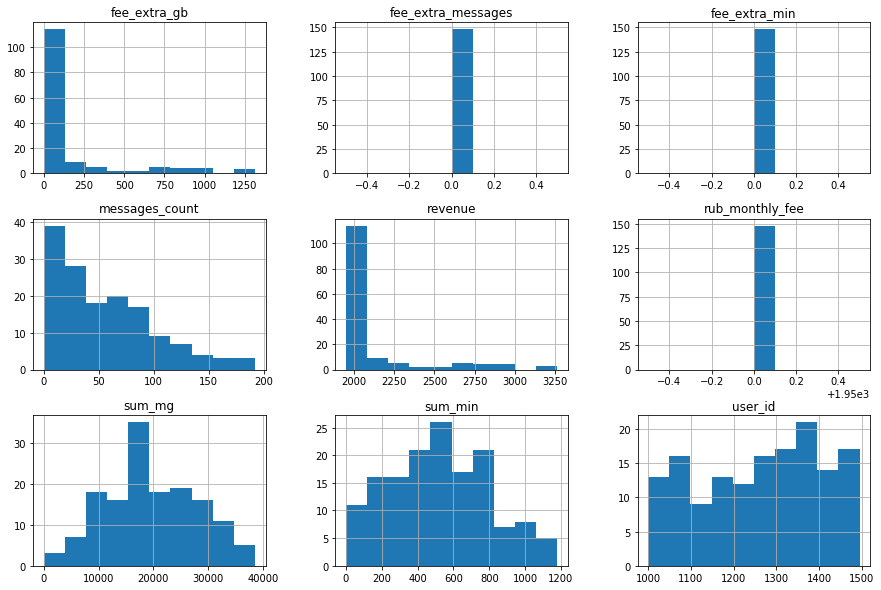

In [60]:
#Гистограммы для ULTRA
df_monthly[df_monthly['tariff']=='ultra'].hist(figsize=(15,10))
plt.show()

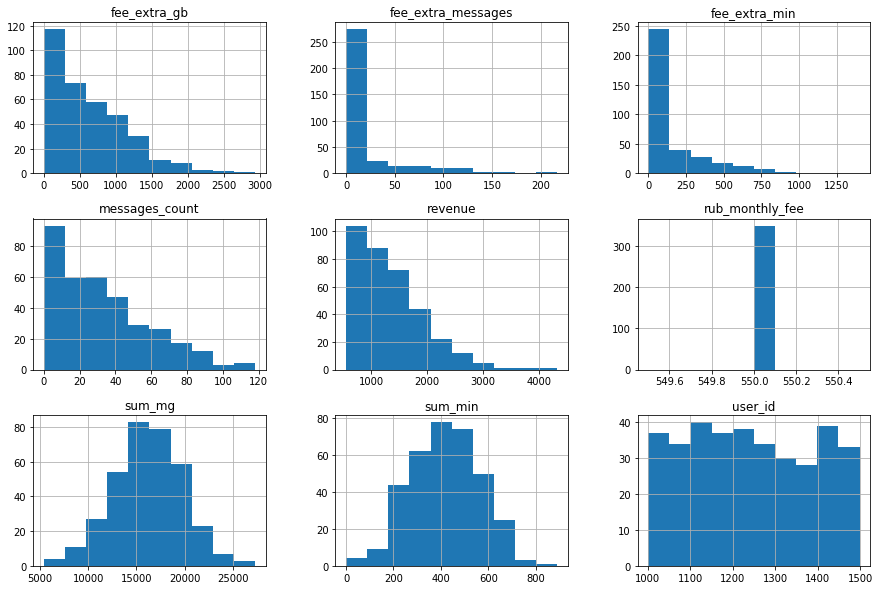

In [61]:
#Гистограммы для SMART
df_monthly[df_monthly['tariff']=='smart'].hist(figsize=(15,10))
plt.show()

На гистограммах более наглядно представлено то, что мы увидели в описательной статистике. 

Для пользователей SMART распределение доплат за расходы сверх лимитов больше похожи на пуассоновские - особенно плата за доп.гб. Концентрация наблюдений ближе к нулю и плавное снижение в сторону больших значений. 
В то же время, доплата за гб в тарифе ULTRA больше похожи на отдельные выбросы, и нет плавного снижения. Переплат за минуты и сообщения в тарифе ULTRA вообще не видно.

Значения выручки по тарифу ULTRA концентрируются в районе цены пакета, а отклонения в большую сторону выглядят как редкие значения. Распределение выручки в тарифе SMART больше напоминает пуассоновское распределение, максимум в районе цены пакета и плавное равномерное снижение вправо. 



## 4. Проверка гипотез.

- H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
- Н1: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

In [62]:
#Формируем две разные совокупности для двух тарифов
df_ultra_revenue=df_monthly['revenue'][df_monthly['tariff']=='ultra']
df_smart_revenue=df_monthly['revenue'][df_monthly['tariff']=='smart']

H₀ всегда формулируем так, чтобы использовать знак равенства. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Есть основание полагать, что выборки взяты из схожих по параметрам совокупностей.

In [63]:
#Тест на проверку гипотезы
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(
    df_ultra_revenue, 
    df_smart_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.597192208808789e-39
Отвергаем нулевую гипотезу


Для выбранного уровня значимости отвергаем нулевую гипотезу. Вывод — средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

### Проверка гипотез.
- H0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
- Н1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [64]:
#Формируем отдельные выборки для Москвы и др.регионов
df_moscow_revenue=df_monthly['revenue'][df_monthly['city']=='Москва']
df_cities_revenue=df_monthly['revenue'][df_monthly['city']!='Москва']

In [65]:
df_moscow_revenue.describe()

count      99.000000
mean     1503.956617
std       604.019842
min       550.000000
25%      1020.833333
50%      1629.428571
75%      1950.000000
max      2935.500000
Name: revenue, dtype: float64

In [66]:
df_cities_revenue.describe()

count     399.000000
mean     1569.775315
std       648.899290
min       550.000000
25%      1010.535714
50%      1620.666667
75%      1950.000000
max      4333.333333
Name: revenue, dtype: float64

Описательная статистика.
- 99 наблюдений для Москвы и 399 для др.регионов.
- Ср.знач. по выборке для Москвы 1504 руб., для др.регионов 1570 руб. 
- Ст.отклонение по выборке для Москвы 604 руб., для др.регионов 649 руб.

Проверим гипотезы.

In [67]:
#Тест на проверку гипотезы
from scipy import stats as st
import numpy as np

alpha = .05

results = st.ttest_ind(
    df_moscow_revenue, 
    df_cities_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.36036365166298434
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний чек пользователей из столицы и регионов и неодинаков, с вероятностью в почти 36% такое различие можно получить случайно.

Для выбранного уровня значимости не отвергаем нулевую гипотезу. Вывод — нет оснований полагать, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## 5. Выводы.

Таким образом, для исследования были загружены 5 таблиц с данными. Все параметры были проанализированы и приведены к нужным типам. Были найдены и удалены 39613 некорректных наблюдений из таблицы о звонках и 19598 наблюдений из таблицы об интернет сессиях. Больше ошибок не обнаружено.

Для каждого пользователя были посчитаны контрольные параметры (ежемесячный потраченный объем и доплата сверх тарифа) отдельно по звонкам, сообщениям и интернету.

Затем данные были объединены в одну таблицу, в которой были представлены ежемесячные расходы для каждого пользователя. На основе этих данных была рассчитана средняя ежемесячная выручка с каждого клиента. 

Для всех параметров таблицы были рассчитаны среднее количество, дисперсию и стандартное отклонение отдельно для двух тарифов. Построены гистограммы. Анализ показал, что статистика по пользователям разных тарифов отличается. Пользователи более мелкого пакета в среднем не укладываются в предоставленные лимиты и переплачивают ежемесячно более, чем 100% цены своего пакета. Однако, благодаря высокой фикс.плате за тариф ULTRA, средняя выручка с клиента на нем больше. 

Таким, образом по описательной статистике был сделан вывод, что продавать более объемный пакет выгоднее.

Далее были проверены две гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; 
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Первую отвергнуть не удалось, вторая была отвергнута. 

Сделан вывод:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; 
2. средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов;
